# Naive Bayes Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/unix/Downloads/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0, 1, 2], inplace=True)

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
X=df.drop("Species", axis=1)
y=df["Species"]

In [12]:
from sklearn.model_selection import train_test_split
 
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size =0.2, random_state = 0)
  
print("xTrain shape : ", xTrain.shape)
print("xTest shape  : ", xTest.shape)
print("yTrain shape : ", yTrain.shape)
print("yTest shape  : ", yTest.shape)

xTrain shape :  (120, 5)
xTest shape  :  (30, 5)
yTrain shape :  (120,)
yTest shape  :  (30,)


In [13]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(xTrain, yTrain)
  
y_pred = GNB.predict(xTest)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, y_pred)

1.0

In [15]:
from sklearn.metrics import precision_score
precision_score(yTest, y_pred, average=None)

array([1., 1., 1.])

In [16]:
from sklearn.metrics import recall_score
recall_score(yTest, y_pred, average=None)

array([1., 1., 1.])

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(yTest, y_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

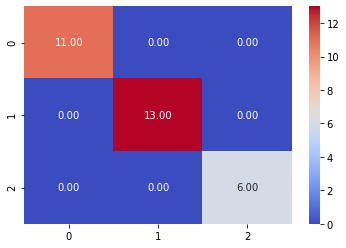

In [18]:
import seaborn as sns
Color_Conf__Matrix = sns.heatmap(confusion_matrix, cmap='coolwarm', annot=True, fmt='0.2f')

In [19]:
from sklearn.metrics import classification_report
print("Classification-Naive Bayes Classifier Report: \n", classification_report(yTest, y_pred))

Classification-Naive Bayes Classifier Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



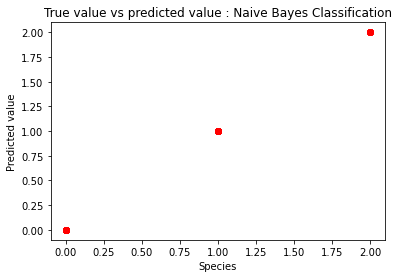

In [20]:
plt.scatter(yTest, y_pred, c = 'red')
plt.xlabel("Species")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Naive Bayes Classification")
plt.show()

In [21]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64